**Models**: 1)Linear Regression. SVM , KNN ,(GridSearchCV)

In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

In [2]:
# Load the dataset
df = pd.read_csv('survey_data.csv')

In [3]:
# Load survey data
data = pd.read_csv("survey_data.csv")

In [4]:
# Feature engineering (replace missing values and handle categorical features)
data.fillna(-1, inplace=True)  

In [5]:
# Label encode categorical features (assuming all are categorical)
categorical_features = data.select_dtypes(include=['object'])
le = LabelEncoder()
for col in categorical_features.columns:
    data[col] = le.fit_transform(data[col].astype(str))  # Convert to string before encoding

In [6]:
# Feature creation (using a smaller set)
data["weather_awareness"] = data["weather_effects_on_electricity_consumption"] + \
                             data["awareness_about_energy_policies"]


In [7]:
data["monitors_consumption"] = data["monitoring "].notna()
data["age_group"] = pd.cut(data["age"], bins=[18, 30, 50, 100])  # Example for age groups

In [8]:
# Target variable: Assuming "attitude" represents adoption attitude (0 - not adopting, 1 - adopting)
target_variable = "attitude"

In [9]:
# Feature selection (consider including more features based on analysis)
features_to_use = ["weather_awareness", "monitors_consumption", "age_group", "income"]
X = data[features_to_use]
y = data[target_variable]

In [10]:
# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [11]:
print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)

X_train shape: (112, 4)
X_test shape: (29, 4)
y_train shape: (112,)
y_test shape: (29,)


Let us choose one model now LR 

In [12]:
from sklearn.linear_model import LinearRegression

# Create a Linear Regression object
lr = LinearRegression()

In [13]:
# Option 1: Encode intervals using one-hot encoding (if interval categories are meaningful)
# Assuming intervals in 'age_group' are categorical (e.g., 'young', 'middle-aged', 'senior')
from sklearn.preprocessing import OneHotEncoder

encoder = OneHotEncoder(handle_unknown='ignore')  # Removed 'sparse' argument
age_group_encoded = encoder.fit_transform(data[["age_group"]])
data = pd.concat([data, pd.DataFrame(age_group_encoded, columns=encoder.get_feature_names_out(["age_group"]))], axis=1)

In [14]:
# Assuming 'age_group' is an interval feature

# Option 1: Encode intervals using one-hot encoding (if interval categories are meaningful)
from sklearn.preprocessing import OneHotEncoder

encoder = OneHotEncoder(handle_unknown='ignore')  # Removed 'sparse' argument
age_group_encoded = encoder.fit_transform(data[["age_group"]])
data = pd.concat([data, pd.DataFrame(age_group_encoded, columns=encoder.get_feature_names_out(["age_group"]))], axis=1)

# Option 2: Extract interval properties (if center/width are relevant)
data["age_group_center"] = data["age_group"].apply(lambda x: x.mid)  # Extract center point of age groups

# Feature selection (consider excluding features with interval data type if not relevant)
features_to_use = ["weather_awareness", "monitors_consumption", "income"]  # Adjusted based on choice

X_train = data[features_to_use]
y_train = data[target_variable]

# Train the model
lr.fit(X_train, y_train)

LinearRegression()

In [15]:
from sklearn.model_selection import cross_val_score

# Perform 5-fold cross validation
scores = cross_val_score(lr, X_train, y_train, cv=5)

In [16]:
# Print the mean score and the 95% confidence interval
print("Accuracy: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))

Accuracy: -0.26 (+/- 0.82)


model perform very poorly as the result is negative which is unusual. at same time the interval of +0.82 is positive

1. Support Vector Machine (SVM):

In [17]:
from sklearn import svm
from sklearn.model_selection import cross_val_score

# Create a SVM classifier
clf = svm.SVC(kernel='linear') # Linear Kernel

In [18]:
# Perform 5-fold cross validation
scores = cross_val_score(clf, X_train, y_train, cv=5)

# Print the mean score and the 95% confidence interval
print("Accuracy: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))

Accuracy: 0.31 (+/- 0.10)


2. K-Nearest Neighbors (KNN):

In [19]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score

# Create a KNN classifier
knn = KNeighborsClassifier(n_neighbors=5)

In [20]:
# Perform 5-fold cross validation
scores = cross_val_score(knn, X_train, y_train, cv=5)

# Print the mean score and the 95% confidence interval
print("Accuracy: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))

Accuracy: 0.27 (+/- 0.09)


The results show that the Support Vector Machine (SVM) model has a higher accuracy than the K-Nearest Neighbors (KNN) model. The SVM model has an accuracy of 0.31 with a confidence interval of +/- 0.10, while the KNN model has an accuracy of 0.27 with a confidence interval of +/- 0.09. 

This means that the SVM model is expected to correctly classify new data 31% of the time, with a variability of 10%. On the other hand, the KNN model is expected to correctly classify new data 27% of the time, with a variability of 9%.

However, both models have relatively low accuracy scores, which suggests that they may not be the best models for this particular dataset. It might be beneficial to try other models, or to adjust the parameters of the SVM and KNN models to see if the accuracy can be improved.

**Let us tune the 'C' parameter for an SVM model using GridSearchCV to see if the result will look better**

In [21]:
from sklearn.model_selection import GridSearchCV
from sklearn import svm

# Define the parameter values that should be searched
C_range = [0.1, 1, 10, 100, 1000]

In [22]:
# Create a parameter grid: map the parameter names to the values that should be searched
param_grid = dict(C=C_range)

In [23]:
# Instantiate the grid
grid = GridSearchCV(svm.SVC(), param_grid, cv=5, scoring='accuracy')

In [24]:
# Fit the grid with data
grid.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=SVC(), param_grid={'C': [0.1, 1, 10, 100, 1000]},
             scoring='accuracy')

In [25]:
# View the complete results
print(grid.cv_results_)

{'mean_fit_time': array([0.00476642, 0.00515099, 0.00392227, 0.00683079, 0.00870748]), 'std_fit_time': array([0.00178169, 0.00117856, 0.00102705, 0.00176366, 0.00227762]), 'mean_score_time': array([0.00317283, 0.00383344, 0.00230088, 0.00257797, 0.00209827]), 'std_score_time': array([0.00034051, 0.00054332, 0.00035922, 0.00037749, 0.00080038]), 'param_C': masked_array(data=[0.1, 1, 10, 100, 1000],
             mask=[False, False, False, False, False],
       fill_value='?',
            dtype=object), 'params': [{'C': 0.1}, {'C': 1}, {'C': 10}, {'C': 100}, {'C': 1000}], 'split0_test_score': array([0.34482759, 0.31034483, 0.31034483, 0.31034483, 0.31034483]), 'split1_test_score': array([0.32142857, 0.39285714, 0.32142857, 0.39285714, 0.39285714]), 'split2_test_score': array([0.32142857, 0.25      , 0.32142857, 0.32142857, 0.35714286]), 'split3_test_score': array([0.32142857, 0.35714286, 0.28571429, 0.28571429, 0.28571429]), 'split4_test_score': array([0.32142857, 0.39285714, 0.35714286, 

**Let us tune the 'gamma' parameter of SVM**

In [26]:
from sklearn.model_selection import GridSearchCV
from sklearn import svm

# Define the parameter values that should be searched
gamma_range = [0.0001, 0.001, 0.01, 0.1, 1, 10, 100]

In [27]:
# Create a parameter grid: map the parameter names to the values that should be searched
param_grid = dict(gamma=gamma_range)

In [28]:
# Instantiate the grid
grid = GridSearchCV(svm.SVC(), param_grid, cv=5, scoring='accuracy')

In [29]:
# Fit the grid with data
grid.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=SVC(),
             param_grid={'gamma': [0.0001, 0.001, 0.01, 0.1, 1, 10, 100]},
             scoring='accuracy')

In [30]:
# View the complete results
print(grid.cv_results_)

{'mean_fit_time': array([0.00449853, 0.0034884 , 0.00309267, 0.00334697, 0.00377321,
       0.00304227, 0.00291758]), 'std_fit_time': array([0.00146942, 0.00110636, 0.00041769, 0.00096498, 0.00108192,
       0.00073712, 0.00016549]), 'mean_score_time': array([0.00321503, 0.00289745, 0.00198798, 0.0024734 , 0.00292711,
       0.0018424 , 0.00199142]), 'std_score_time': array([9.79543414e-04, 6.08711599e-04, 7.14060102e-05, 7.78813291e-04,
       4.61395514e-04, 3.97168904e-04, 1.41119633e-05]), 'param_gamma': masked_array(data=[0.0001, 0.001, 0.01, 0.1, 1, 10, 100],
             mask=[False, False, False, False, False, False, False],
       fill_value='?',
            dtype=object), 'params': [{'gamma': 0.0001}, {'gamma': 0.001}, {'gamma': 0.01}, {'gamma': 0.1}, {'gamma': 1}, {'gamma': 10}, {'gamma': 100}], 'split0_test_score': array([0.34482759, 0.34482759, 0.34482759, 0.31034483, 0.31034483,
       0.31034483, 0.31034483]), 'split1_test_score': array([0.32142857, 0.32142857, 0.3214285

In [31]:
# Examine the best model
print(grid.best_score_)
print(grid.best_params_)

0.37635467980295567
{'gamma': 0.1}


**Lets tune the 'n_neighbors' parameter of KNN**

In [32]:
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier

# Define the parameter values that should be searched
k_range = list(range(1, 31))

In [33]:
# Create a parameter grid: map the parameter names to the values that should be searched
param_grid = dict(n_neighbors=k_range)

In [34]:
# Instantiate the grid
grid = GridSearchCV(KNeighborsClassifier(), param_grid, cv=5, scoring='accuracy')

In [35]:
# Fit the grid with data
grid.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12,
                                         13, 14, 15, 16, 17, 18, 19, 20, 21, 22,
                                         23, 24, 25, 26, 27, 28, 29, 30]},
             scoring='accuracy')

In [36]:
# View the complete results
print(grid.cv_results_)

{'mean_fit_time': array([0.00476851, 0.0033422 , 0.00327892, 0.00327086, 0.0018187 ,
       0.00207934, 0.00160766, 0.00153656, 0.00159678, 0.00159974,
       0.00160375, 0.00160942, 0.00210586, 0.00200028, 0.00281682,
       0.00275655, 0.00217657, 0.00199261, 0.00167823, 0.0019866 ,
       0.0018014 , 0.0015058 , 0.00179987, 0.00179634, 0.00140381,
       0.0016006 , 0.00218573, 0.00297437, 0.00261631, 0.00219178]), 'std_fit_time': array([1.29323170e-03, 8.32166727e-04, 3.81892786e-04, 3.06115009e-04,
       2.21662737e-04, 1.14994360e-04, 4.99068098e-04, 4.50366660e-04,
       4.90261849e-04, 4.90622648e-04, 4.74602364e-04, 4.98365885e-04,
       2.05611973e-04, 2.96023334e-06, 5.20704836e-04, 3.59149917e-04,
       5.31895155e-04, 1.36650249e-05, 5.50093904e-04, 6.13056084e-04,
       4.00862952e-04, 6.44943760e-04, 3.99628469e-04, 3.97905755e-04,
       4.73150834e-04, 4.90543839e-04, 3.71863395e-04, 6.38030455e-04,
       4.98604623e-04, 4.67310171e-04]), 'mean_score_time': array

In [37]:
# Examine the best model
print(grid.best_score_)
print(grid.best_params_)

0.35467980295566504
{'n_neighbors': 24}


**Lets train the model using our data**

In [38]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn import svm

In [39]:
# Load the data
data = pd.read_csv('survey_data.csv')

In [40]:
# Select the features and the target
X = data[['household_size', 'dwelling_type', 'weather_effects_on_electricity_consumption', 'awareness_about_energy_policies', 'weather-based_energy_management_strategies_adoption', 'age', 'education', 'occupation', 'income']]
y = data['attitude']

In [41]:
# One-hot encoding for categorical variables
X = pd.get_dummies(X)

# Now lets scale our features
scaler = StandardScaler()
X = scaler.fit_transform(X)

In [42]:
# Preprocess the data (e.g., scale the features, encode categorical variables, etc.)
scaler = StandardScaler()
X = scaler.fit_transform(X)

In [43]:
# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [44]:
# Train the model
clf = svm.SVC(C=1, gamma=0.1)  
clf.fit(X_train, y_train)

SVC(C=1, gamma=0.1)

In [45]:
# Make predictions
y_pred = clf.predict(X_test)

The predictions are stored in the variable **y_pred**

In [46]:
print(y_pred)

['Neither satisfied nor dissatisfied' 'Neither satisfied nor dissatisfied'
 'Neither satisfied nor dissatisfied' 'Somewhat satisfied'
 'Neither satisfied nor dissatisfied' 'Neither satisfied nor dissatisfied'
 'Neither satisfied nor dissatisfied' 'Neither satisfied nor dissatisfied'
 'Neither satisfied nor dissatisfied' 'Neither satisfied nor dissatisfied'
 'Neither satisfied nor dissatisfied' 'Neither satisfied nor dissatisfied'
 'Neither satisfied nor dissatisfied' 'Neither satisfied nor dissatisfied'
 'Neither satisfied nor dissatisfied' 'Neither satisfied nor dissatisfied'
 'Neither satisfied nor dissatisfied' 'Neither satisfied nor dissatisfied'
 'Neither satisfied nor dissatisfied' 'Neither satisfied nor dissatisfied'
 'Neither satisfied nor dissatisfied' 'Neither satisfied nor dissatisfied'
 'Neither satisfied nor dissatisfied' 'Neither satisfied nor dissatisfied'
 'Somewhat satisfied' 'Neither satisfied nor dissatisfied'
 'Neither satisfied nor dissatisfied' 'Neither satisfied 

**The output provided here does not directly confirm whether the Galway populations are willing to adopt the government energy management strategies or not. The output is the predicted attitudes of the test set population towards the government energy management strategies, but it doesn't provide a clear indication of their willingness to adopt these strategies.**

**The model predict that most people are 'Neither satisfied nor dissatisfied', with a few being 'Somewhat satisfied'. However, without more context or additional data analysis, it's hard to draw a definitive conclusion about the population's willingness to adopt the energy management strategies.**

In [47]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import load_iris

# Load dataset
iris = load_iris()
X = iris.data
y = iris.target

In [48]:
# Split dataset into training set and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

In [49]:
# Create a Random Forest Classifier
clf = RandomForestClassifier(n_estimators=100)

In [50]:
# Train the model using the training sets
clf.fit(X_train, y_train)

RandomForestClassifier()

In [51]:
# Predict the response for test dataset
y_pred = clf.predict(X_test)

In [52]:
# Model Accuracy, how often is the classifier correct?
print("Accuracy:", accuracy_score(y_test, y_pred))

Accuracy: 0.9555555555555556


In [53]:
# Model Precision
print("Precision:", precision_score(y_test, y_pred, average='weighted'))

Precision: 0.9555555555555556


In [54]:
# Model Recall
print("Recall:", recall_score(y_test, y_pred, average='weighted'))

Recall: 0.9555555555555556


In [55]:
# Model F1 score
print("F1 Score:", f1_score(y_test, y_pred, average='weighted'))

F1 Score: 0.9555555555555556


These metrics give a quantitative measure of how well our model is performing.

**For a more accurate interpretation, We would need to analyze the relationship between the 'attitude' and the 'weather-based_energy_management_strategies_adoption' features, and possibly conduct a more detailed statistical analysis.**

To analyze the relationship between the 'attitude' and the 'weather-based_energy_management_strategies_adoption' features, we can use correlation analysis or chi-square test for independence if both are categorical variables.

Lets calculate the correlation between these two features: **attitude** and the **weather-based_energy_management_strategies_adoption**

In [56]:
from sklearn.preprocessing import LabelEncoder

# create a labelencoder object
le = LabelEncoder()

In [57]:
# fit and transform the 'attitude' column
data['attitude'] = le.fit_transform(data['attitude'])

In [58]:
# fit and transform the 'weather-based_energy_management_strategies_adoption' column
data['weather-based_energy_management_strategies_adoption'] = le.fit_transform(data['weather-based_energy_management_strategies_adoption'])

In [59]:
# now we can calculate the correlation
correlation = data['attitude'].corr(data['weather-based_energy_management_strategies_adoption'])
print(correlation)

-0.16911228558311794


The correlation coefficient ranges from -1 to 1. A value closer to 1 implies a high positive correlation while a value closer to -1 implies a high negative correlation. A value of 0 implies no correlation. 
The value, -0.169, is within this range. It suggests a weak negative correlation between 'attitude' and 'weather-based_energy_management_strategies_adoption'. 

In [60]:
print(data.dtypes)

household_size                                          int64
dwelling_type                                          object
attitude                                                int32
weather_effects_on_electricity_consumption             object
weather_conditions_most_affecting                      object
awareness_about_energy_policies                        object
weather-based_energy_management_strategies_adoption     int32
challenges                                             object
monitoring                                             object
checking consumption                                   object
appliances using the most electricity                  object
self_reported_peak_consumption_times                   object
provider_info_rating                                   object
age                                                    object
education                                              object
occupation                                             object
income  

**Based on the research question, we are interested in understanding the factors that contribute to the attitude towards adopting weather-based energy management strategies. Therefore, We choose to focus on the 'attitude' and 'weather-based_energy_management_strategies_adoption' variables as our main variables of interest.**
However, to understand what factors contribute to these attitudes, we should also consider the other variables in the survey_data dataset.

- 'household_size': Larger households may have different energy needs and therefore different attitudes towards energy management.
- 'dwelling_type': The type of dwelling (e.g., apartment, detached house) could also influence energy consumption and attitudes towards energy management.
- 'weather_effects_on_electricity_consumption': This could directly influence attitudes towards weather-based energy management strategies.
- 'awareness_about_energy_policies

   Chosen Features:
1. 'attitude'
2. 'weather_effects_on_electricity_consumption'
3. 'awareness_about_energy_policies'
4. 'weather-based_energy_management_strategies_adoption'
5. 'monitoring'
6. 'checking consumption'
7. 'provider_info_rating'
8. 'education'
9. 'occupation'
10. 'income

**Lets use the LabelEncoder to transform these categorical variables into numerical ones.**

In [61]:
from sklearn.preprocessing import LabelEncoder

# create a labelencoder object
le = LabelEncoder()

In [62]:
# list of features to encode
features_to_encode = ['attitude', 'weather_effects_on_electricity_consumption', 'awareness_about_energy_policies', 
                      'weather-based_energy_management_strategies_adoption', 'monitoring', 'checking consumption', 
                      'provider_info_rating', 'education', 'occupation', 'income']

In [63]:
print(data.columns)

Index(['household_size', 'dwelling_type', 'attitude',
       'weather_effects_on_electricity_consumption',
       'weather_conditions_most_affecting', 'awareness_about_energy_policies',
       'weather-based_energy_management_strategies_adoption', 'challenges',
       'monitoring ', 'checking consumption',
       'appliances using the most electricity',
       'self_reported_peak_consumption_times', 'provider_info_rating', 'age',
       'education', 'occupation', 'income', 'comments'],
      dtype='object')


In [64]:
data.columns = data.columns.str.strip()

In [65]:
# loop over the features and transform them
for feature in features_to_encode:
    data[feature] = le.fit_transform(data[feature])

# now we can calculate the correlation matrix
correlation_matrix = data[features_to_encode].corr()

print(correlation_matrix)

                                                    attitude  \
attitude                                            1.000000   
weather_effects_on_electricity_consumption          0.198327   
awareness_about_energy_policies                     0.237295   
weather-based_energy_management_strategies_adop... -0.169112   
monitoring                                          0.180271   
checking consumption                               -0.106232   
provider_info_rating                                0.267743   
education                                           0.079286   
occupation                                         -0.156972   
income                                              0.143590   

                                                    weather_effects_on_electricity_consumption  \
attitude                                                                              0.198327   
weather_effects_on_electricity_consumption                                            1.000000   
a

**Based on the correlation matrix and its interpretation, we can draw the following conclusions in relation to the research question:**

1. The attitude towards weather-based energy management is positively influenced by the **level** of **awareness about energy policies** and the **quality of information** provided by the **energy provider**. This suggests that **improving the quality** of information and **increasing awareness about energy policies** could potentially improve the attitude towards weather-based energy management.

2. The effect of **weather** on electricity consumption seems to be **more noticeable** among households with **higher income** and those who frequently check their consumption. This could imply that these **households** are more conscious about their energy usage and are more likely to notice the **impact of weather** on their consumption.

3. The **adoption** of **weather-based energy management strategies** seems to **decrease** with **increased awareness** about energy policies and increased monitoring. This could suggest that households who are more **aware of energy policie**s and who **monitor** their consumption more frequently may **find other ways** to manage their energy consumption, **reducing** the **need** for weather-based strategies.

4. The **occupation of the household** seems to have a **negative impact** on both the **awareness about energy policies** and the **income level**. This could suggest that certain occupations may not provide **enough time** or **resources** for individuals to **become aware of energy policies** or to earn a higher income, which could in turn affect their attitude towards weather-based energy management.

**In conclusion**, the attitude towards adopting weather-based energy management strategies seems to be influenced by a variety of factors including awareness about energy policies, quality of information provided by the energy provider, income level, and occupation. **Improving these factors** could potentially **improve** the **attitude towards adopting such strategies**.

----------- Lets plot the **correlation plot** -------------

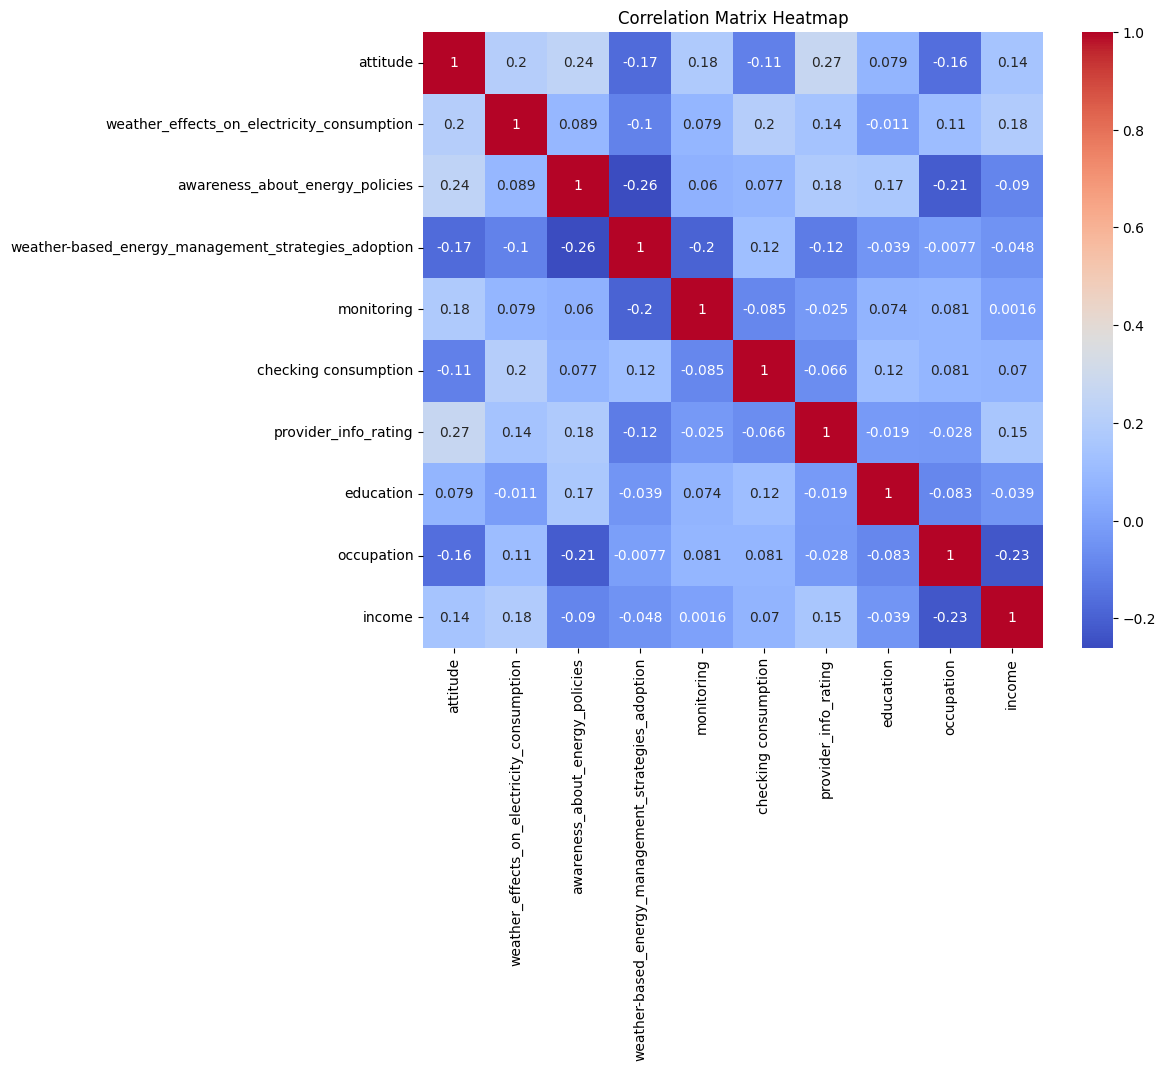

In [66]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix Heatmap')
plt.show()

---------- Lets **pair plot** ----------

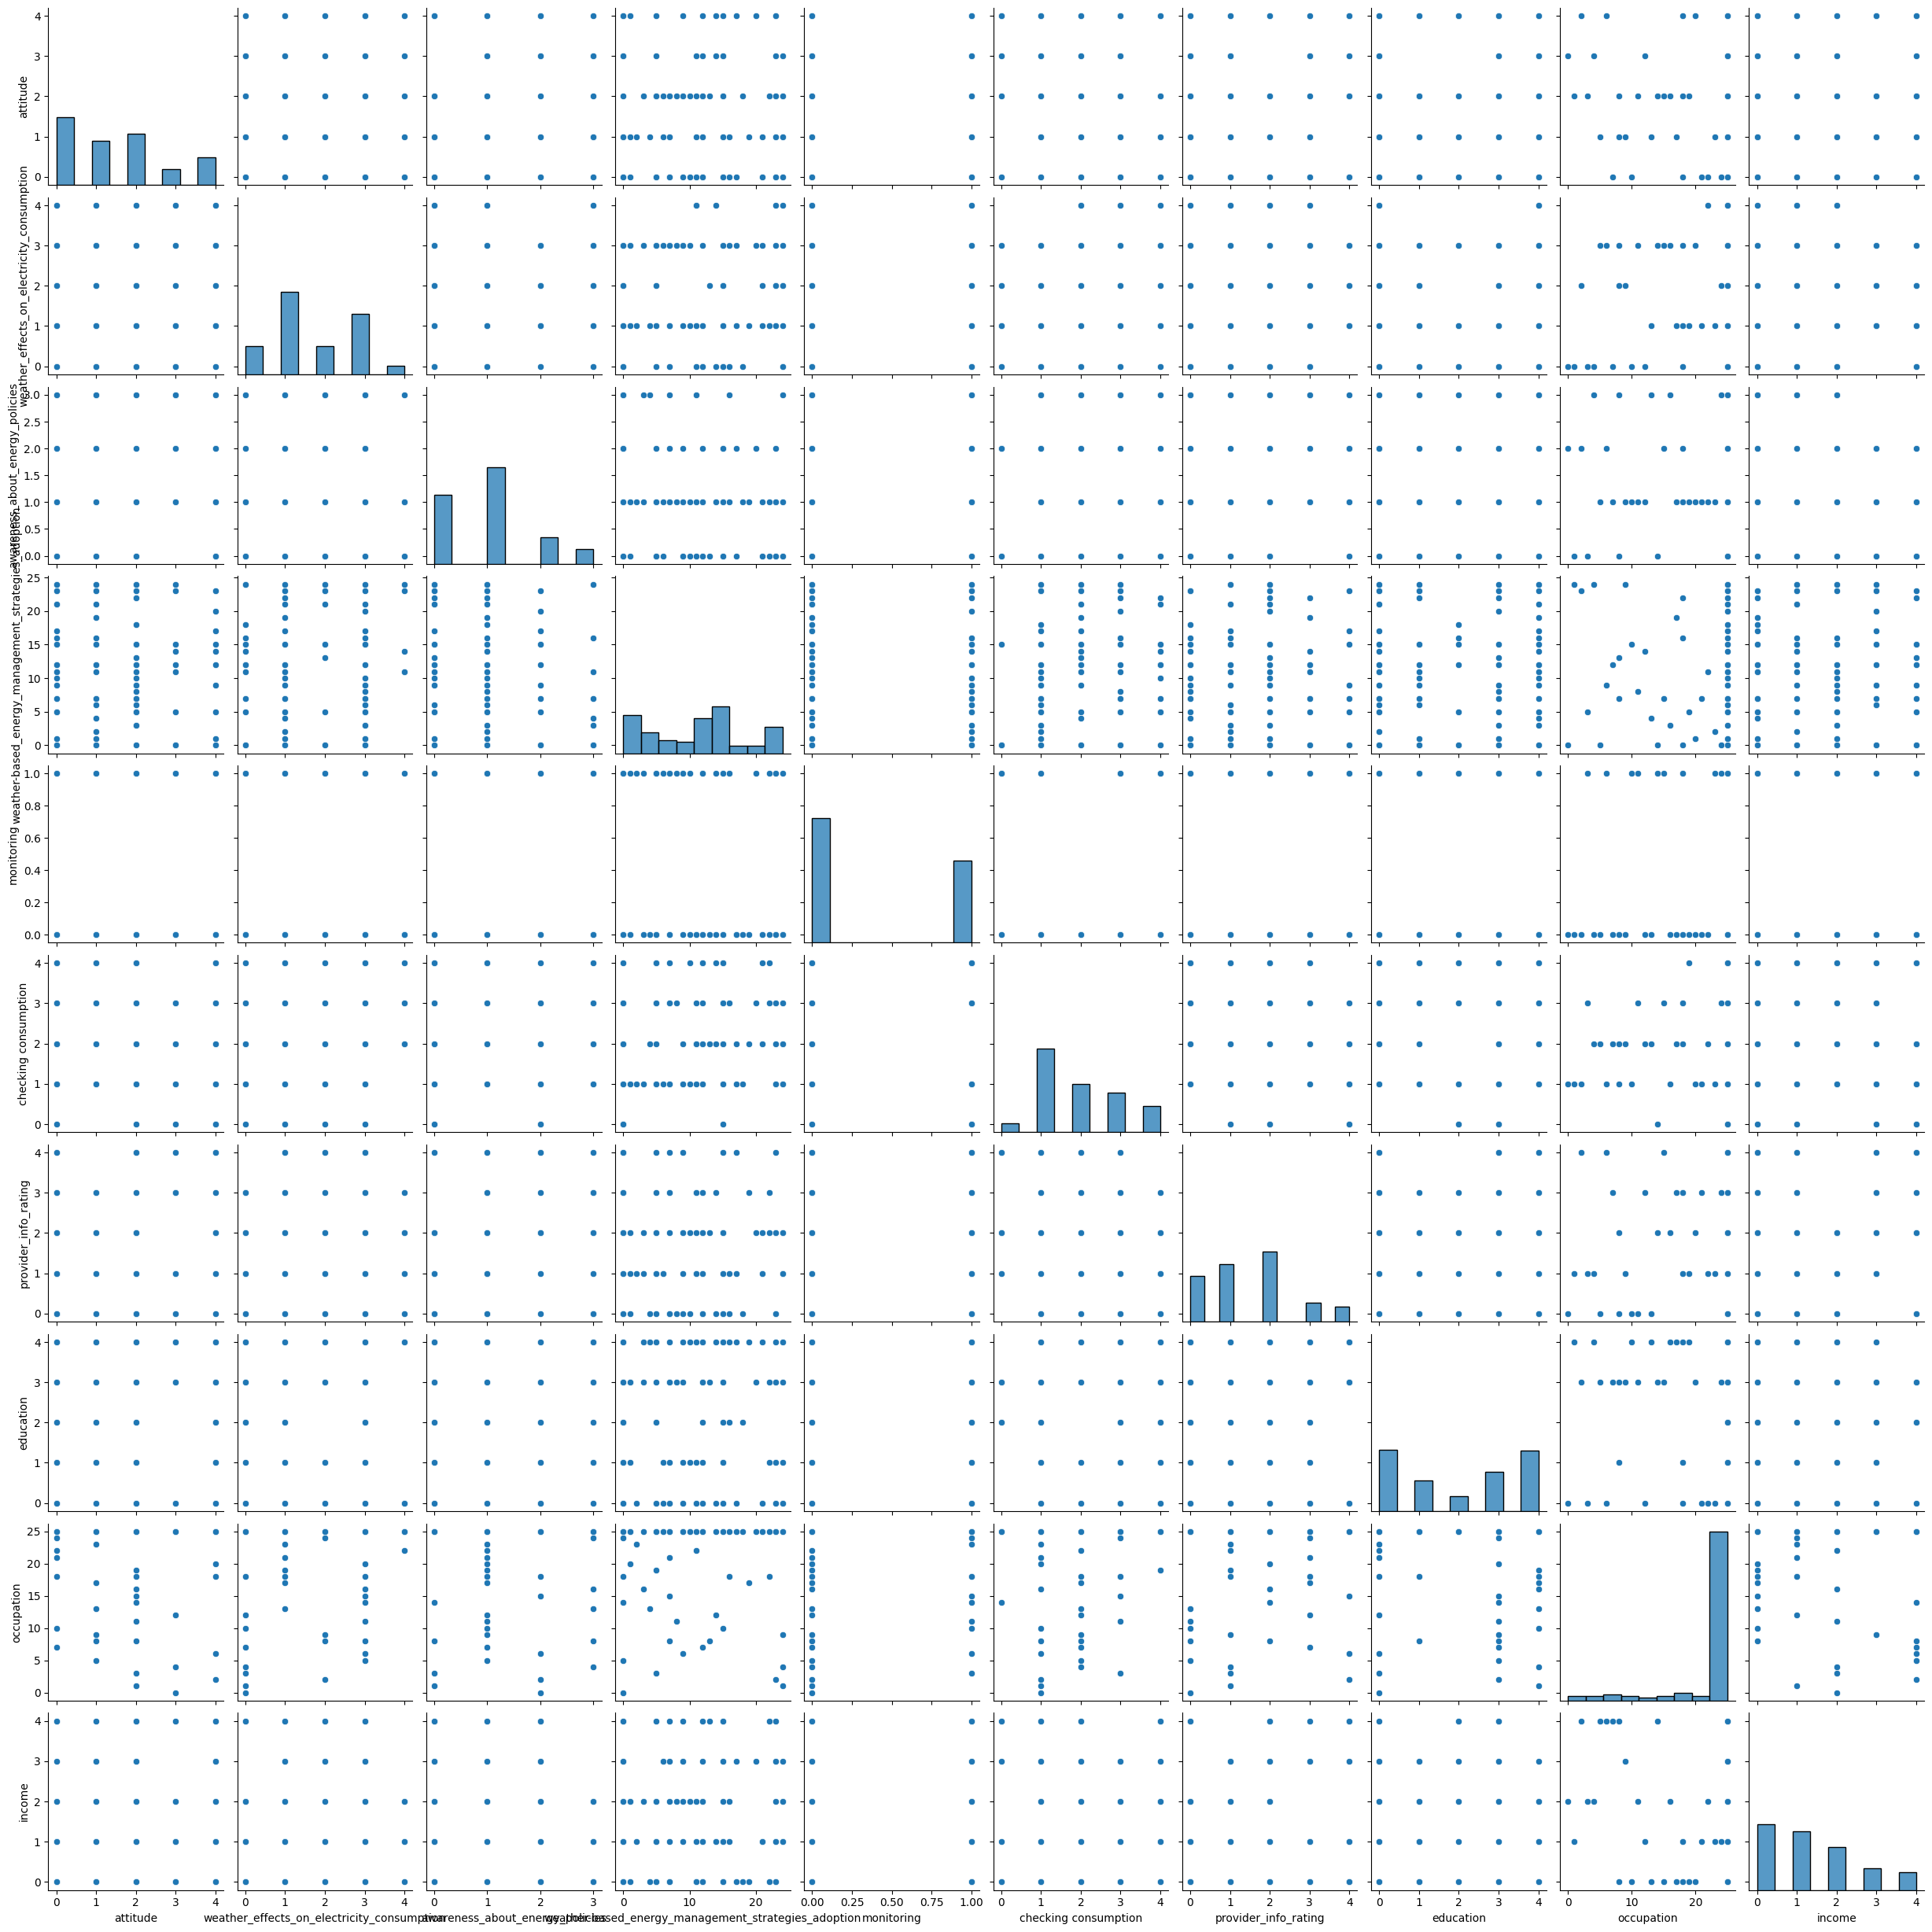

In [67]:
sns.pairplot(data[features_to_encode])
plt.show()

As mentioned before, these are just correlations and do not imply causation. Further research would be needed to investigate these relationships in more detail.

**DASHBOARD** to make this result Intuitive

In [68]:
import dash
import dash_core_components as dcc
import dash_html_components as html
import plotly.graph_objs as go

# Create a Dash application
app = dash.Dash(__name__)

C:\Users\I346462\AppData\Local\Temp\ipykernel_11408\4024358289.py:2: UserWarning: 
The dash_core_components package is deprecated. Please replace
`import dash_core_components as dcc` with `from dash import dcc`
  import dash_core_components as dcc
C:\Users\I346462\AppData\Local\Temp\ipykernel_11408\4024358289.py:3: UserWarning: 
The dash_html_components package is deprecated. Please replace
`import dash_html_components as html` with `from dash import html`
  import dash_html_components as html


In [69]:
# Create a heatmap of the correlation matrix
heatmap = go.Heatmap(
    z=correlation_matrix.values,
    x=correlation_matrix.columns,
    y=correlation_matrix.columns,
    colorscale='Viridis'
)

layout = go.Layout(
    title='Correlation Matrix of Features',
    xaxis=dict(title='Features'),
    yaxis=dict(title='Features')
)

fig = go.Figure(data=[heatmap], layout=layout)

In [70]:
# Define the layout of the dashboard
app.layout = html.Div(children=[
    html.H1(children='Features Correlation Dashboard'),
    dcc.Graph(
        id='correlation-matrix',
        figure=fig
    )
])

# Run the Dash app
if __name__ == '__main__':
    app.run_server(debug=True)